In [1]:
# import the necessary packages
import os

from scipy.fft import fft2

import numpy as np
from PIL import Image
import cv2

import tqdm
import matplotlib.pyplot as plt
plt.rcParams["figure.dpi"] = 150

import stitching as st

from IPython.display import clear_output

In [2]:
imagePath = '/home/jack/Videos/map_2_images/'
imageExtension = 'png'
fileTemplateName = 'image'

detectoryType = 'akaze'

images = [imagePath + i for i in os.listdir(imagePath) if imageExtension in i]
imageIndexing = [int(img.split(fileTemplateName)[-1].split('.')[0]) for img in images]

images = np.array(images)[np.argsort(imageIndexing)]

100%|███████████████████████████| 30/30 [00:04<00:00,  7.06it/s]


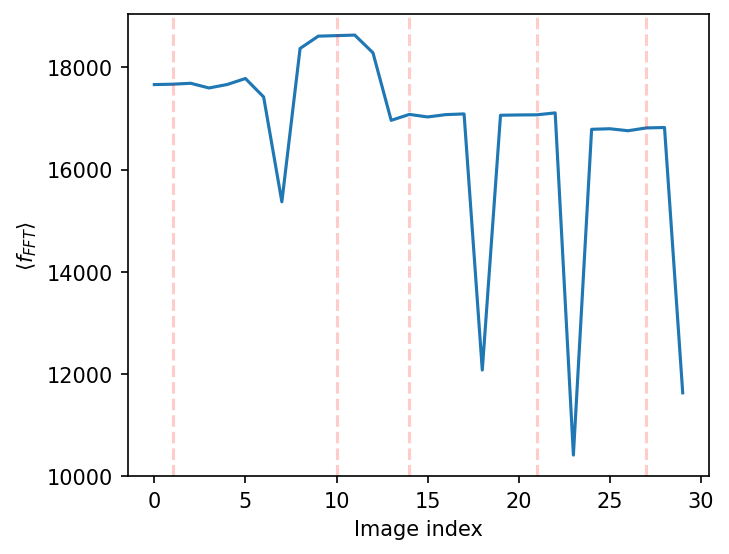

Found 5 stable images


In [3]:
stableImageIndices = st.identifyStableImages(images[:30], derThreshold=.05, debug=True)
print(f'Found {len(stableImageIndices)} stable images')

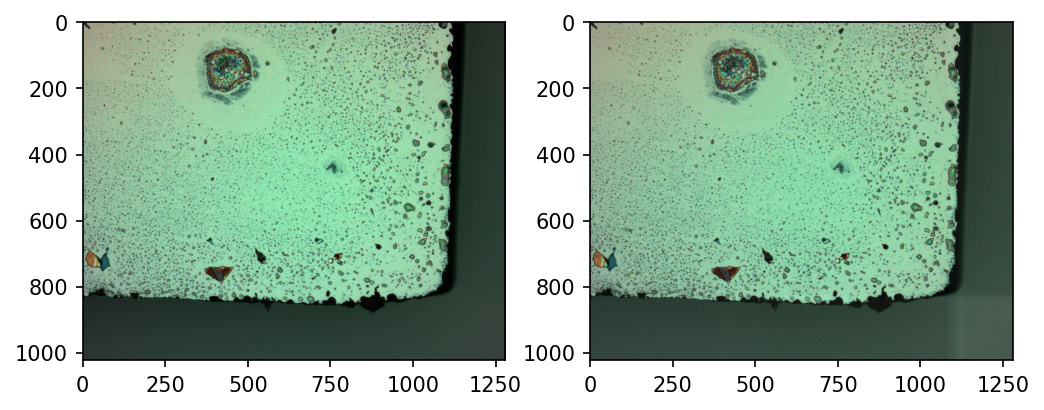

In [6]:
fig, ax = plt.subplots(1, 2, figsize=(8,4))

img = cv2.imread(images[stableImageIndices[0]])

ax[0].imshow(img)
ax[1].imshow(st.equalizeSpatialGradients(img, strength=.1))

plt.show()